### Импортируем функции и датасет

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import norm

from itertools import combinations

from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # выведем больше строк

pd.set_option('display.max_columns', 50) # выведем больше колонок

sns.set_style('darkgrid')

study = pd.read_csv('stud_math.csv')

In [2]:
def cont_col_describe(column):
    """Функция для описания числовых столбцов"""
    
    counts = study[column].value_counts(dropna=False)
    percent = study[column].value_counts(dropna=False, normalize=True)
    percent100 = study[column].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
    display(pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}))
    
    print(study[column].describe())
  
    plt.hist(study.loc[:, column][study[column].notna()])

    print('')
    print(f'Всего {len(study[column].value_counts())} значений в столбце', column,\
          f', {len(study[column][study[column].isna()])} пропусков')
    
def cat_col_describe(column):
    """Функция для описания текстовых столбцов"""
    
    counts = study[column].value_counts(dropna=False)
    percent = study[column].value_counts(dropna=False, normalize=True)
    percent100 = study[column].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
    display(pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}))
    
    print(study[column].describe())

    sns.distplot(study[column], bins = len(study[column].value_counts()), fit=norm, kde=False)
    
    print('')
    print(f'Всего {len(study[column].value_counts())} значений в столбце', column,\
          f', {len(study[column][study[column].isna()])} пропусков')

def get_boxplot(column):
    """Функция для построения боксплотов"""
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=study.loc[study.loc[:, column].isin(study.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)    
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    """Проверка, на статистическую разницу"""
    cols = study.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'], 
                        study.loc[study.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### Общая информация о датасете

In [3]:
study.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
print(f'Всего {study.isnull().any().sum()} колонок с пропущеными значениями.')

Всего 27 колонок с пропущеными значениями.


In [6]:
one_value_cols = [col for col in study.columns if study[col].nunique() <= 1]
print(f'Всего {len(one_value_cols)} столбцов в датасете с одним уникальным значением.')

Всего 0 столбцов в датасете с одним уникальным значением.


### Изучаем столбцы

score — баллы по госэкзамену по математике


,counts,per,per100
50.0,54,0.136709,13.7%
55.0,46,0.116456,11.6%
0.0,37,0.093671,9.4%
75.0,33,0.083544,8.4%
65.0,31,0.078481,7.8%
40.0,31,0.078481,7.8%
60.0,31,0.078481,7.8%
45.0,27,0.068354,6.8%
70.0,27,0.068354,6.8%
80.0,16,0.040506,4.1%


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Всего 18 значений в столбце score , 6 пропусков


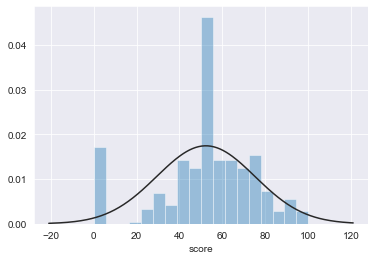

In [7]:
# Начнем с конца: изучаем столбец score 30/30

print('score — баллы по госэкзамену по математике')

cat_col_describe('score')

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


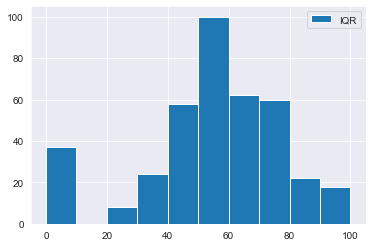

In [8]:
#Видим, что у нас предположительно присутствует выброс со значением 0. Проверим его по формуле:

median = study.score.median()
IQR = study.score.quantile(0.75) - study.score.quantile(0.25)
perc25 = study.score.quantile(0.25)
perc75 = study.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
study.score.loc[study.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, 
                                                                              range = (0, 100),
                                                                              label = 'IQR')
plt.legend();

In [9]:
# Значение ноль попадает в границу выбросов, но тем не менее логика подсказывает, 
# что нулевой балл не связан с реальной успеваемостью, поэтому отсеим эти значения, а заодно и пустые

study = study.loc[study.score > 0]

school — аббревиатура школы, в которой учится ученик


,counts,per,per100
GP,311,0.883523,88.4%
MS,41,0.116477,11.6%


count     352
unique      2
top        GP
freq      311
Name: school, dtype: object

Всего 2 значений в столбце school , 0 пропусков


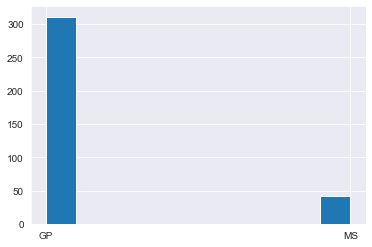

In [10]:
# Изучаем столбец school 1/30

print('school — аббревиатура школы, в которой учится ученик')

cont_col_describe('school')

In [11]:
# В датасете представлены данные по 2 школам: GP и MS. Попробуем проанализировать каждую

# Выведем статистику по оценкам

print("Оценки", sep = '\n')

print("", "Школа GP", "", sep = '\n')
print(study[study["school"] == "GP"]['score'].describe())

print("", "Школа MS", "", sep = '\n')
print(study[study["school"] == "MS"]['score'].describe())

# Выведем статистику по половому составу

print("", "Половой состав", sep = '\n')

print("", "Школа GP", sep = '\n')
counts = study[study["school"] == "GP"]['sex'].value_counts(dropna=False)
percent = study[study["school"] == "GP"]['sex'].value_counts(dropna=False, normalize=True)
percent100 = study[study["school"] == "GP"]['sex'].value_counts(dropna=False, normalize=True).\
mul(100).round(1).astype(str) + '%'
display(pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}))

print("", "Школа MS", sep = '\n')
counts = study[study["school"] == "MS"]['sex'].value_counts(dropna=False)
percent = study[study["school"] == "MS"]['sex'].value_counts(dropna=False, normalize=True)
percent100 = study[study["school"] == "MS"]['sex'].value_counts(dropna=False, normalize=True).\
mul(100).round(1).astype(str) + '%'
display(pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}))

Оценки

Школа GP

count    311.000000
mean      58.215434
std       16.282245
min       20.000000
25%       47.500000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Школа MS

count    41.000000
mean     54.268293
std      15.311800
min      25.000000
25%      45.000000
50%      50.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

Половой состав

Школа GP


,counts,per,per100
F,160,0.514469,51.4%
M,151,0.485531,48.6%



Школа MS


,counts,per,per100
F,22,0.536585,53.7%
M,19,0.463415,46.3%


In [12]:
#Видим, что оценки и возраст сопоставимы, поэтому можно отбросить этот столбец

study.drop(['school'], inplace = True, axis = 1)

sex — пол ученика (F - женский, M - мужской)


,counts,per,per100
F,182,0.517045,51.7%
M,170,0.482955,48.3%


count     352
unique      2
top         F
freq      182
Name: sex, dtype: object

Всего 2 значений в столбце sex , 0 пропусков


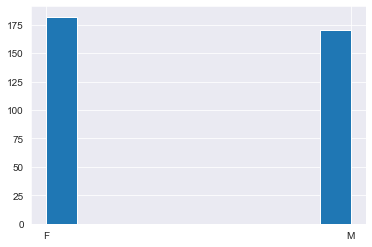

In [13]:
# Изучаем столбец sex 2/30

print('sex — пол ученика (F - женский, M - мужской)')

cont_col_describe('sex')

In [14]:
# Возрастной состав примерно одинаков, пропусков нет, оставляем этот столбец без изменений

age — возраст ученика (от 15 до 22)


,counts,per,per100
16,96,0.272727,27.3%
17,90,0.255682,25.6%
15,76,0.215909,21.6%
18,69,0.196023,19.6%
19,16,0.045455,4.5%
20,3,0.008523,0.9%
22,1,0.002841,0.3%
21,1,0.002841,0.3%


count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Всего 8 значений в столбце age , 0 пропусков


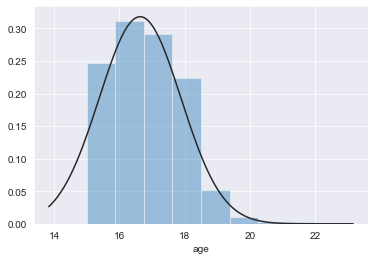

In [15]:
# Изучаем столбец age 3/30

print('age — возраст ученика (от 15 до 22)')

cat_col_describe('age')

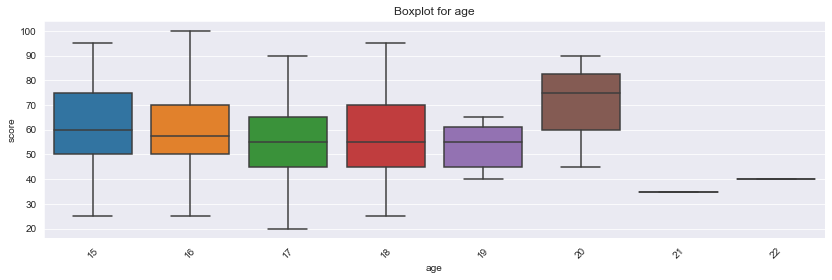

In [16]:
# В рамках нашей задачи нет необходимости сегментировать учащихся по возрастам,
# но тем не менее посмотрим, как распределяются баллы

get_boxplot('age')

In [17]:
# Почему-то идет понижение среднего балла по математике с увеличением возраста.
# Посмотрим, может ли на это влиять образовние родителей и наличие интернета

get_stat_dif('age')

study.corr()



C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.121617,0.095370,-0.011426,0.235875,0.011426,0.074152,0.004837,0.123638,-0.056173,0.112599,-0.131542
Medu,-0.122979,1.000000,0.247339,-0.165394,0.070533,-0.205944,-0.070533,-0.000958,0.021002,0.080556,-0.038050,-0.027377,0.186477
Fedu,-0.121617,0.247339,1.000000,0.042074,0.049060,-0.141995,-0.049060,0.049613,-0.071328,-0.026507,0.025874,0.000245,0.069842
traveltime,0.095370,-0.165394,0.042074,1.000000,-0.101490,0.091757,0.101490,-0.023920,-0.023067,0.029374,-0.000092,-0.047560,-0.075516
studytime,-0.011426,0.070533,0.049060,-0.101490,1.000000,-0.156406,-1.000000,0.063856,-0.128661,-0.029686,-0.085469,-0.030187,0.142055
failures,0.235875,-0.205944,-0.141995,0.091757,-0.156406,1.000000,0.156406,-0.011414,0.127391,0.126770,0.064083,0.089541,-0.289377
"studytime, granular",0.011426,-0.070533,-0.049060,0.101490,-1.000000,0.156406,1.000000,-0.063856,0.128661,0.029686,0.085469,0.030187,-0.142055
famrel,0.074152,-0.000958,0.049613,-0.023920,0.063856,-0.011414,-0.063856,1.000000,0.162283,0.050751,0.096471,-0.089609,0.046717
freetime,0.004837,0.021002,-0.071328,-0.023067,-0.128661,0.127391,0.128661,0.162283,1.000000,0.296392,0.072729,0.007748,-0.012457
goout,0.123638,0.080556,-0.026507,0.029374,-0.029686,0.126770,0.029686,0.050751,0.296392,1.000000,-0.010343,-0.050616,-0.182286


address — тип адреса ученика (U - городской, R - за городом)


,counts,per,per100
U,265,0.752841,75.3%
R,73,0.207386,20.7%
NaN,14,0.039773,4.0%


count     338
unique      2
top         U
freq      265
Name: address, dtype: object

Всего 2 значений в столбце address , 14 пропусков


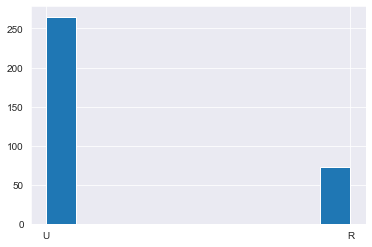

In [18]:
# Изучаем столбец address 4/30

print('address — тип адреса ученика (U - городской, R - за городом)')

cont_col_describe('address')

famsize — размер семьи(LE3 <= 3, GT3 >3)


,counts,per,per100
GT3,228,0.647727,64.8%
LE3,100,0.284091,28.4%
NaN,24,0.068182,6.8%


count     328
unique      2
top       GT3
freq      228
Name: famsize, dtype: object

Всего 2 значений в столбце famsize , 24 пропусков


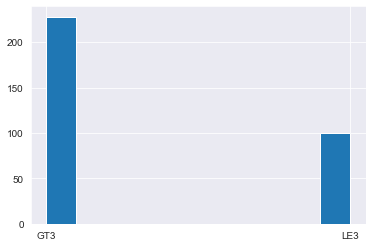

In [19]:
# Изучаем столбец famsize 5/30

print('famsize — размер семьи(LE3 <= 3, GT3 >3)')

cont_col_describe('famsize')

Pstatus — статус совместного жилья родителей (T - живут вместе A - раздельно)


,counts,per,per100
T,277,0.786932,78.7%
NaN,41,0.116477,11.6%
A,34,0.096591,9.7%


count     311
unique      2
top         T
freq      277
Name: Pstatus, dtype: object

Всего 2 значений в столбце Pstatus , 41 пропусков


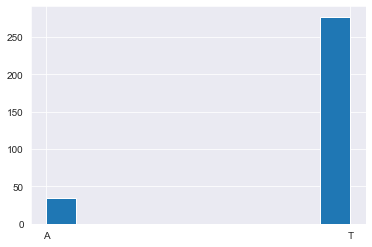

In [20]:
# Изучаем столбец Pstatus 6/30

print('Pstatus — статус совместного жилья родителей (T - живут вместе A - раздельно)')

cont_col_describe('Pstatus')

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


,counts,per,per100
4.0,125,0.355114,35.5%
2.0,88,0.250000,25.0%
3.0,87,0.247159,24.7%
1.0,47,0.133523,13.4%
0.0,3,0.008523,0.9%
NaN,2,0.005682,0.6%


count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Всего 5 значений в столбце Medu , 2 пропусков


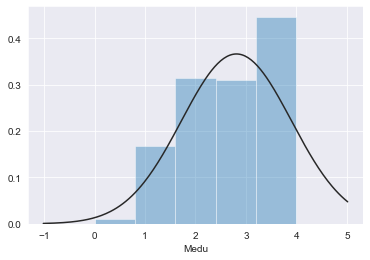

In [21]:
# Изучаем столбец Medu 7/30

print('Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, '\
      '3 - среднее специальное или 11 классов, 4 - высшее)')

cat_col_describe('Medu')

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


,counts,per,per100
2.0,94,0.267045,26.7%
3.0,89,0.252841,25.3%
4.0,80,0.227273,22.7%
1.0,65,0.184659,18.5%
NaN,21,0.059659,6.0%
0.0,2,0.005682,0.6%
40.0,1,0.002841,0.3%


count    331.000000
mean       2.658610
std        2.324066
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

Всего 6 значений в столбце Fedu , 21 пропусков


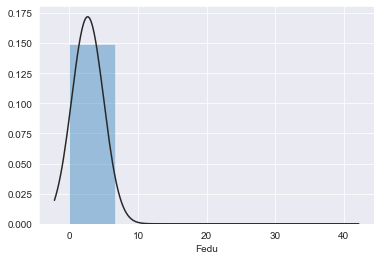

In [22]:
# Изучаем столбец Fedu 8/30

print('Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, '\
      '3 - среднее специальное или 11 классов, 4 - высшее)')

cat_col_describe('Fedu')

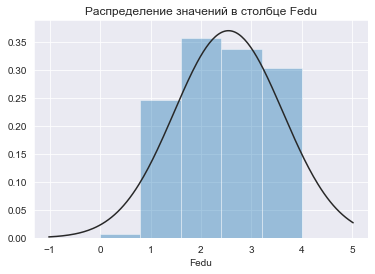

In [23]:
# Очевидно, что 40 - это выброс. Удаляем его

study = study.loc[study.Fedu <= 4]

plt.title('Распределение значений в столбце Fedu')
sns.distplot(study['Fedu'], bins = 5, fit=norm, kde=False)

Mjob — работа матери (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


,counts,per,per100
other,108,0.327273,32.7%
services,84,0.254545,25.5%
at_home,48,0.145455,14.5%
teacher,44,0.133333,13.3%
health,29,0.087879,8.8%
NaN,17,0.051515,5.2%


count       313
unique        5
top       other
freq        108
Name: Mjob, dtype: object

Всего 5 значений в столбце Mjob , 17 пропусков


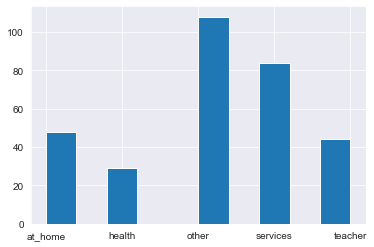

In [24]:
# Изучаем столбец Mjob 9/30

print('Mjob — работа матери (teacher - учитель, health - сфера здравоохранения, '\
      'services - гос служба, at_home - не работает, other - другое)')

cont_col_describe('Mjob')

Fjob — работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


,counts,per,per100
other,169,0.512121,51.2%
services,83,0.251515,25.2%
NaN,30,0.090909,9.1%
teacher,23,0.069697,7.0%
health,13,0.039394,3.9%
at_home,12,0.036364,3.6%


count       300
unique        5
top       other
freq        169
Name: Fjob, dtype: object

Всего 5 значений в столбце Fjob , 30 пропусков


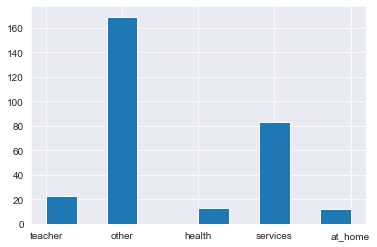

In [25]:
# Изучаем столбец Fjob 10/30

print('Fjob — работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, '\
      'at_home - не работает, other - другое)')

cont_col_describe('Fjob')

reason — причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)


,counts,per,per100
course,111,0.336364,33.6%
reputation,91,0.275758,27.6%
home,82,0.248485,24.8%
other,31,0.093939,9.4%
NaN,15,0.045455,4.5%


count        315
unique         4
top       course
freq         111
Name: reason, dtype: object

Всего 4 значений в столбце reason , 15 пропусков


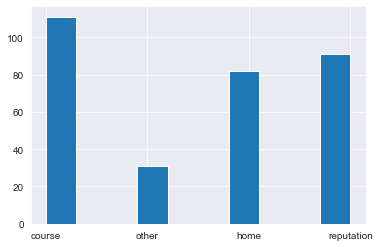

In [26]:
# Изучаем столбец reason 11/30

print('reason — причина выбора школы (home - близость к дому, reputation - репутация школы, '\
      'course - образовательная программа, other - другое)')

cont_col_describe('reason')

guardian — опекун (mother - мать, father - отец, other - другое)


,counts,per,per100
mother,211,0.639394,63.9%
father,71,0.215152,21.5%
NaN,28,0.084848,8.5%
other,20,0.060606,6.1%


count        302
unique         3
top       mother
freq         211
Name: guardian, dtype: object

Всего 3 значений в столбце guardian , 28 пропусков


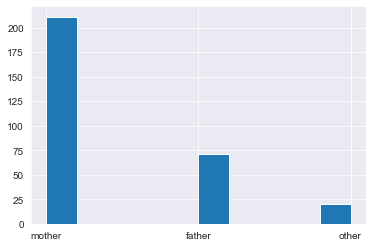

In [27]:
# Изучаем столбец guardian 12/30

print('guardian — опекун (mother - мать, father - отец, other - другое)')

cont_col_describe('guardian')

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)


,counts,per,per100
1.0,203,0.615152,61.5%
2.0,82,0.248485,24.8%
NaN,22,0.066667,6.7%
3.0,16,0.048485,4.8%
4.0,7,0.021212,2.1%


count    308.000000
mean       1.438312
std        0.698598
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Всего 4 значений в столбце traveltime , 22 пропусков


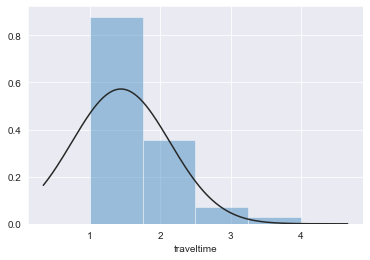

In [28]:
# Изучаем столбец traveltime 13/30

print('traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)')

cat_col_describe('traveltime')

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


,counts,per,per100
2.0,162,0.490909,49.1%
1.0,86,0.260606,26.1%
3.0,52,0.157576,15.8%
4.0,23,0.069697,7.0%
NaN,7,0.021212,2.1%


count    323.000000
mean       2.037152
std        0.844335
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Всего 4 значений в столбце studytime , 7 пропусков


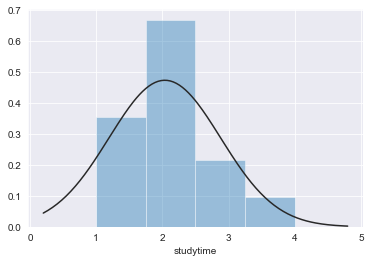

In [29]:
# Изучаем столбец studytime 14/30

print('studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)')

cat_col_describe('studytime')

failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)


,counts,per,per100
0.0,258,0.781818,78.2%
1.0,35,0.106061,10.6%
NaN,17,0.051515,5.2%
2.0,10,0.030303,3.0%
3.0,10,0.030303,3.0%


count    313.000000
mean       0.271565
std        0.674435
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Всего 4 значений в столбце failures , 17 пропусков


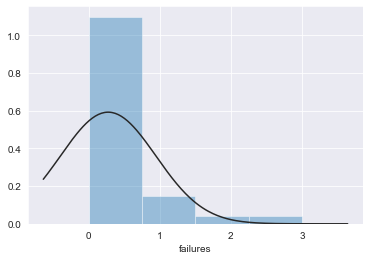

In [30]:
# Изучаем столбец failures 15/30

print('failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)')

cat_col_describe('failures')

schoolsup — дополнительная образовательная поддержка (yes или no)


,counts,per,per100
no,277,0.839394,83.9%
yes,44,0.133333,13.3%
NaN,9,0.027273,2.7%


count     321
unique      2
top        no
freq      277
Name: schoolsup, dtype: object

Всего 2 значений в столбце schoolsup , 9 пропусков


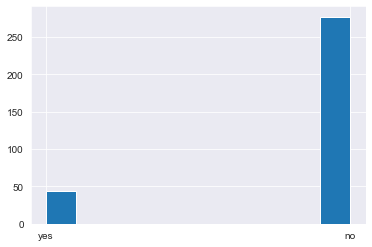

In [31]:
# Изучаем столбец schoolsup 16/30

print('schoolsup — дополнительная образовательная поддержка (yes или no)')

cont_col_describe('schoolsup')

famsup — семейная образовательная поддержка (yes или no)


,counts,per,per100
yes,182,0.551515,55.2%
no,116,0.351515,35.2%
NaN,32,0.096970,9.7%


count     298
unique      2
top       yes
freq      182
Name: famsup, dtype: object

Всего 2 значений в столбце famsup , 32 пропусков


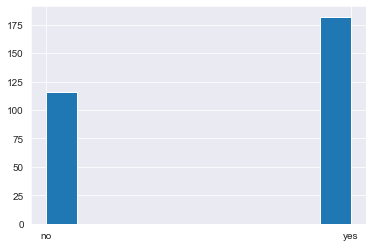

In [32]:
# Изучаем столбец famsup 17/30

print('famsup — семейная образовательная поддержка (yes или no)')

cont_col_describe('famsup')

paid — дополнительные платные занятия по математике (yes или no)


,counts,per,per100
no,160,0.484848,48.5%
yes,137,0.415152,41.5%
NaN,33,0.100000,10.0%


count     297
unique      2
top        no
freq      160
Name: paid, dtype: object

Всего 2 значений в столбце paid , 33 пропусков


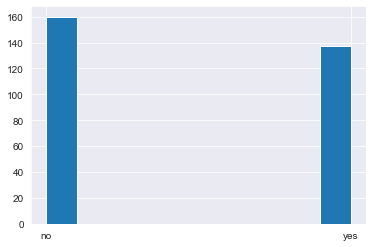

In [33]:
# Изучаем столбец paid 18/30

print('paid — дополнительные платные занятия по математике (yes или no)')

cont_col_describe('paid')

activities — дополнительные внеучебные занятия (yes или no)


,counts,per,per100
yes,160,0.484848,48.5%
no,158,0.478788,47.9%
NaN,12,0.036364,3.6%


count     318
unique      2
top       yes
freq      160
Name: activities, dtype: object

Всего 2 значений в столбце activities , 12 пропусков


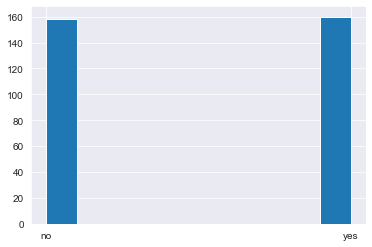

In [34]:
# Изучаем столбец activities 19/30

print('activities — дополнительные внеучебные занятия (yes или no)')

cont_col_describe('activities')

nursery — посещал детский сад (yes или no)


,counts,per,per100
yes,252,0.763636,76.4%
no,66,0.200000,20.0%
NaN,12,0.036364,3.6%


count     318
unique      2
top       yes
freq      252
Name: nursery, dtype: object

Всего 2 значений в столбце nursery , 12 пропусков


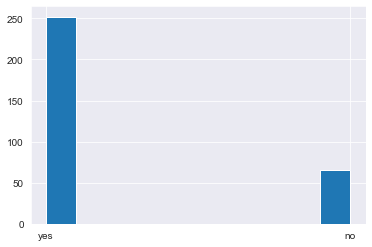

In [35]:
# Изучаем столбец nursery 20/30

print('nursery — посещал детский сад (yes или no)')

cont_col_describe('nursery')

,counts,per,per100
-6.0,162,0.490909,49.1%
-3.0,86,0.260606,26.1%
-9.0,52,0.157576,15.8%
-12.0,23,0.069697,7.0%
NaN,7,0.021212,2.1%


count    323.000000
mean      -6.111455
std        2.533004
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

Всего 4 значений в столбце studytime, granular , 7 пропусков


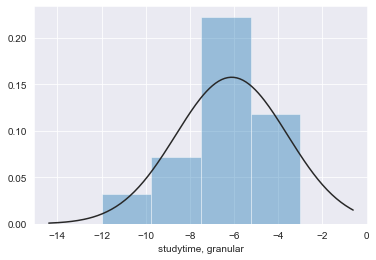

In [36]:
# Изучаем столбец studytime, granular 21/30

print('')

cat_col_describe('studytime, granular')

higher — хочет получить высшее образование (yes или no)


,counts,per,per100
yes,300,0.909091,90.9%
NaN,17,0.051515,5.2%
no,13,0.039394,3.9%


count     313
unique      2
top       yes
freq      300
Name: higher, dtype: object

Всего 2 значений в столбце higher , 17 пропусков


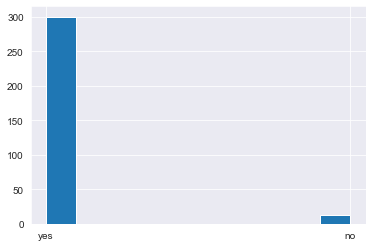

In [37]:
# Изучаем столбец higher 22/30

print('higher — хочет получить высшее образование (yes или no)')

cont_col_describe('higher')

internet — наличие интернета дома (yes или no)


,counts,per,per100
yes,253,0.766667,76.7%
no,48,0.145455,14.5%
NaN,29,0.087879,8.8%


count     301
unique      2
top       yes
freq      253
Name: internet, dtype: object

Всего 2 значений в столбце internet , 29 пропусков


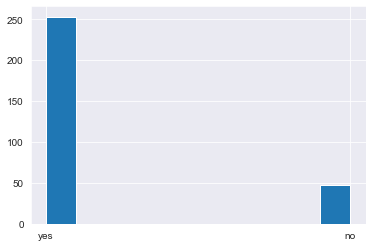

In [38]:
# Изучаем столбец internet 23/30

print('internet — наличие интернета дома (yes или no)')

cont_col_describe('internet')

romantic — в романтических отношениях (yes или no)


,counts,per,per100
no,205,0.621212,62.1%
yes,99,0.300000,30.0%
NaN,26,0.078788,7.9%


count     304
unique      2
top        no
freq      205
Name: romantic, dtype: object

Всего 2 значений в столбце romantic , 26 пропусков


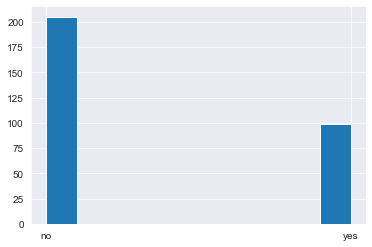

In [39]:
# Изучаем столбец romantic 24/30

print('romantic — в романтических отношениях (yes или no)')

cont_col_describe('romantic')

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


,counts,per,per100
4.0,151,0.457576,45.8%
5.0,84,0.254545,25.5%
3.0,54,0.163636,16.4%
NaN,21,0.063636,6.4%
2.0,13,0.039394,3.9%
1.0,6,0.018182,1.8%
-1.0,1,0.003030,0.3%


count    309.000000
mean       3.938511
std        0.932515
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Всего 6 значений в столбце famrel , 21 пропусков


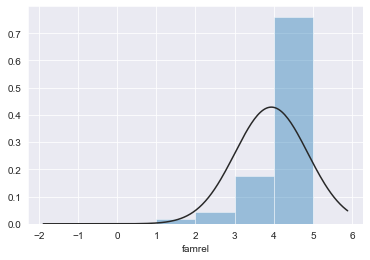

In [40]:
# Изучаем столбец famrel 25/30

print('famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)')

cat_col_describe('famrel')

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)


,counts,per,per100
3.0,125,0.378788,37.9%
4.0,95,0.287879,28.8%
2.0,56,0.169697,17.0%
5.0,32,0.096970,9.7%
1.0,16,0.048485,4.8%
NaN,6,0.018182,1.8%


count    324.000000
mean       3.219136
std        1.006852
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Всего 5 значений в столбце freetime , 6 пропусков


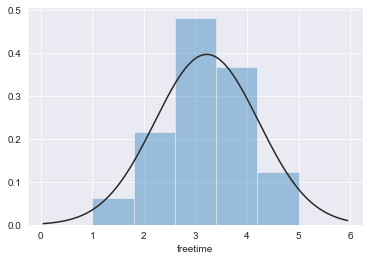

In [41]:
# Изучаем столбец freetime 26/30

print('freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)')

cat_col_describe('freetime')

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


,counts,per,per100
3.0,113,0.342424,34.2%
2.0,84,0.254545,25.5%
4.0,69,0.209091,20.9%
5.0,39,0.118182,11.8%
1.0,19,0.057576,5.8%
NaN,6,0.018182,1.8%


count    324.000000
mean       3.077160
std        1.089026
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Всего 5 значений в столбце goout , 6 пропусков


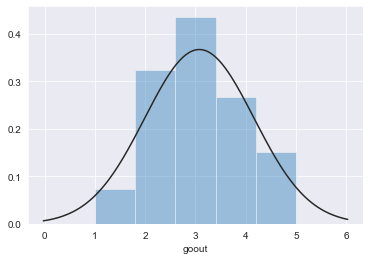

In [42]:
# Изучаем столбец goout 27/30

print('goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)')

cat_col_describe('goout')

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


,counts,per,per100
5.0,113,0.342424,34.2%
3.0,76,0.230303,23.0%
4.0,51,0.154545,15.5%
1.0,44,0.133333,13.3%
2.0,34,0.103030,10.3%
NaN,12,0.036364,3.6%


count    318.000000
mean       3.487421
std        1.418056
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Всего 5 значений в столбце health , 12 пропусков


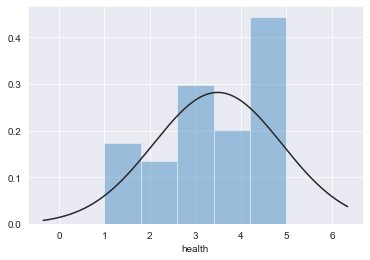

In [43]:
# Изучаем столбец health 28/30

print('health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)')

cat_col_describe('health')

absences — количество пропущенных занятий


,counts,per,per100
0.0,71,0.215152,21.5%
2.0,57,0.172727,17.3%
4.0,47,0.142424,14.2%
6.0,28,0.084848,8.5%
8.0,20,0.060606,6.1%
10.0,15,0.045455,4.5%
14.0,11,0.033333,3.3%
12.0,11,0.033333,3.3%
NaN,10,0.030303,3.0%
3.0,7,0.021212,2.1%


count    320.000000
mean       8.159375
std       25.476086
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Всего 34 значений в столбце absences , 10 пропусков


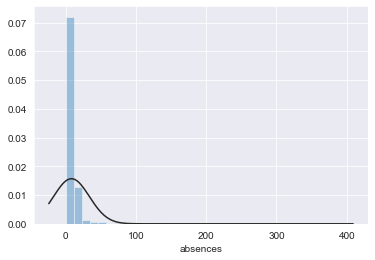

In [44]:
# Изучаем столбец absences 29/30

print('absences — количество пропущенных занятий')

cat_col_describe('absences')